# Machine Learning in CompBio
# Assignment 1 - Rafail Adam, 7115152400009
## Data Exploration

In [71]:
# Loading the necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import os
from pathlib import Path

In [ ]:
# Determine the project root directory (assumes that the notebook is inside Assignment-1/notebooks/)
notebook_path = Path.cwd()
project_root = notebook_path.parent

# Build relative paths to the data folder
dev_data_path = project_root / "data" / "assignment1_dev_set.csv"
eval_data_path = project_root / "data" / "assignment1_val_set.csv"


In [73]:
train_dframe = pd.read_csv(dev_data_path, header=0)
train_dframe.head()
# Get a feel for the data
# Describe gives us information about means, medians, standard deviations, etc.
train_dframe.describe()

,Unnamed: 0,Host age,BMI,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,Actinomyces lingnae,Akkermansia muciniphila,Alistipes finegoldii,Alistipes indistinctus,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
count,489.000000,489.000000,489.00000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,...,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000
mean,244.000000,46.703497,24.93955,0.016818,0.029968,0.294917,0.001608,1.555914,0.249606,0.061796,...,0.029822,0.247603,0.032148,0.097871,0.052936,0.038531,0.006565,0.012565,0.041855,0.091976
std,141.306405,15.728231,4.20771,0.145035,0.197816,0.804704,0.010431,4.306539,0.630670,0.239054,...,0.090605,0.490321,0.180606,0.197044,0.310313,0.122225,0.018357,0.097056,0.181979,0.416085
min,0.000000,19.000000,16.97000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,122.000000,31.000000,22.38000,0.000000,0.000000,0.000000,0.000000,0.003438,0.003380,0.000000,...,0.000000,0.002570,0.000000,0.004881,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,244.000000,52.000000,25.10000,0.000000,0.000000,0.001109,0.000000,0.034284,0.044961,0.000000,...,0.000260,0.047224,0.000000,0.029362,0.000000,0.001687,0.000000,0.000000,0.003266,0.007035
75%,366.000000,58.000000,25.80000,0.000000,0.000000,0.129398,0.000000,0.820242,0.188550,0.045111,...,0.027723,0.303173,0.005768,0.100294,0.015439,0.018352,0.005693,0.000000,0.020020,0.020978
max,488.000000,81.000000,67.26000,2.861300,2.622820,7.660350,0.206426,38.834900,6.068670,4.478660,...,1.465160,3.714530,3.118150,1.801190,4.726220,1.173380,0.273194,1.939150,2.478070,6.752840


</p>As we can see from the informatoin above, the csv is comprised of both numerical and categorical data. We can use the pandas library to explore the data and understand the structure of the data. The information we get for each sample includes the Project ID, the type of experiment, the sex of the person, their age and BMI, the Disease MESH ID and a number of other columns referring to (presumably) the measurements of different microbes in their gut. In all microbe columns we can see that the minimum values are 0.0 while the maximum value varies.</p>

</p>We also drop the columns corresponding to the Project ID and the Disease MESH ID, since they include only one ID (for MESH) and the Project ID as it is expected to only introduce bias. We can also drop the columns corresponding to the type of experiment, since they are not very informative either (contain only 1 value).</p>

In [74]:
# Drop the Unnamed column as it is used as an index, and the other columns as they contain information that is not relevant for our analysis
train_dframe = train_dframe.drop(columns=['Unnamed: 0'])
train_dframe = train_dframe.drop(columns=['Project ID'])
train_dframe = train_dframe.drop(columns=['Experiment type'])
train_dframe = train_dframe.drop(columns=['Disease MESH ID'])

# Check for missing values
for col in train_dframe.columns:
    print(f"Column {col} has {train_dframe[col].isna().sum()} NA values")

Column Sex has 0 NA values
Column Host age has 0 NA values
Column BMI has 0 NA values
Column Acholeplasma axanthum has 0 NA values
Column Acidaminococcus fermentans has 0 NA values
Column Acidaminococcus intestini has 0 NA values
Column Actinomyces lingnae has 0 NA values
Column Akkermansia muciniphila has 0 NA values
Column Alistipes finegoldii has 0 NA values
Column Alistipes indistinctus has 0 NA values
Column Alistipes obesi has 0 NA values
Column Alistipes onderdonkii has 0 NA values
Column Alistipes putredinis has 0 NA values
Column Alistipes shahii has 0 NA values
Column Alistipes sp. RMA 9912 has 0 NA values
Column Alistipes timonensis has 0 NA values
Column Anaerofilum pentosovorans has 0 NA values
Column Anaerofustis stercorihominis has 0 NA values
Column Anaerostipes butyraticus has 0 NA values
Column Anaerostipes caccae has 0 NA values
Column Anaerotruncus colihominis has 0 NA values
Column Bacillus megaterium has 0 NA values
Column Bacillus nealsonii has 0 NA values
Column

</p> As we can see, there seem to be no missing values in the dataset which is helpful as the size of the dataset is relatively small.</p>

In [75]:
#  Check for and drop duplicate rows
duplicates = train_dframe.duplicated().sum()
print(f"Duplicates = {duplicates}")

Duplicates = 0


Males: 302
Females: 187


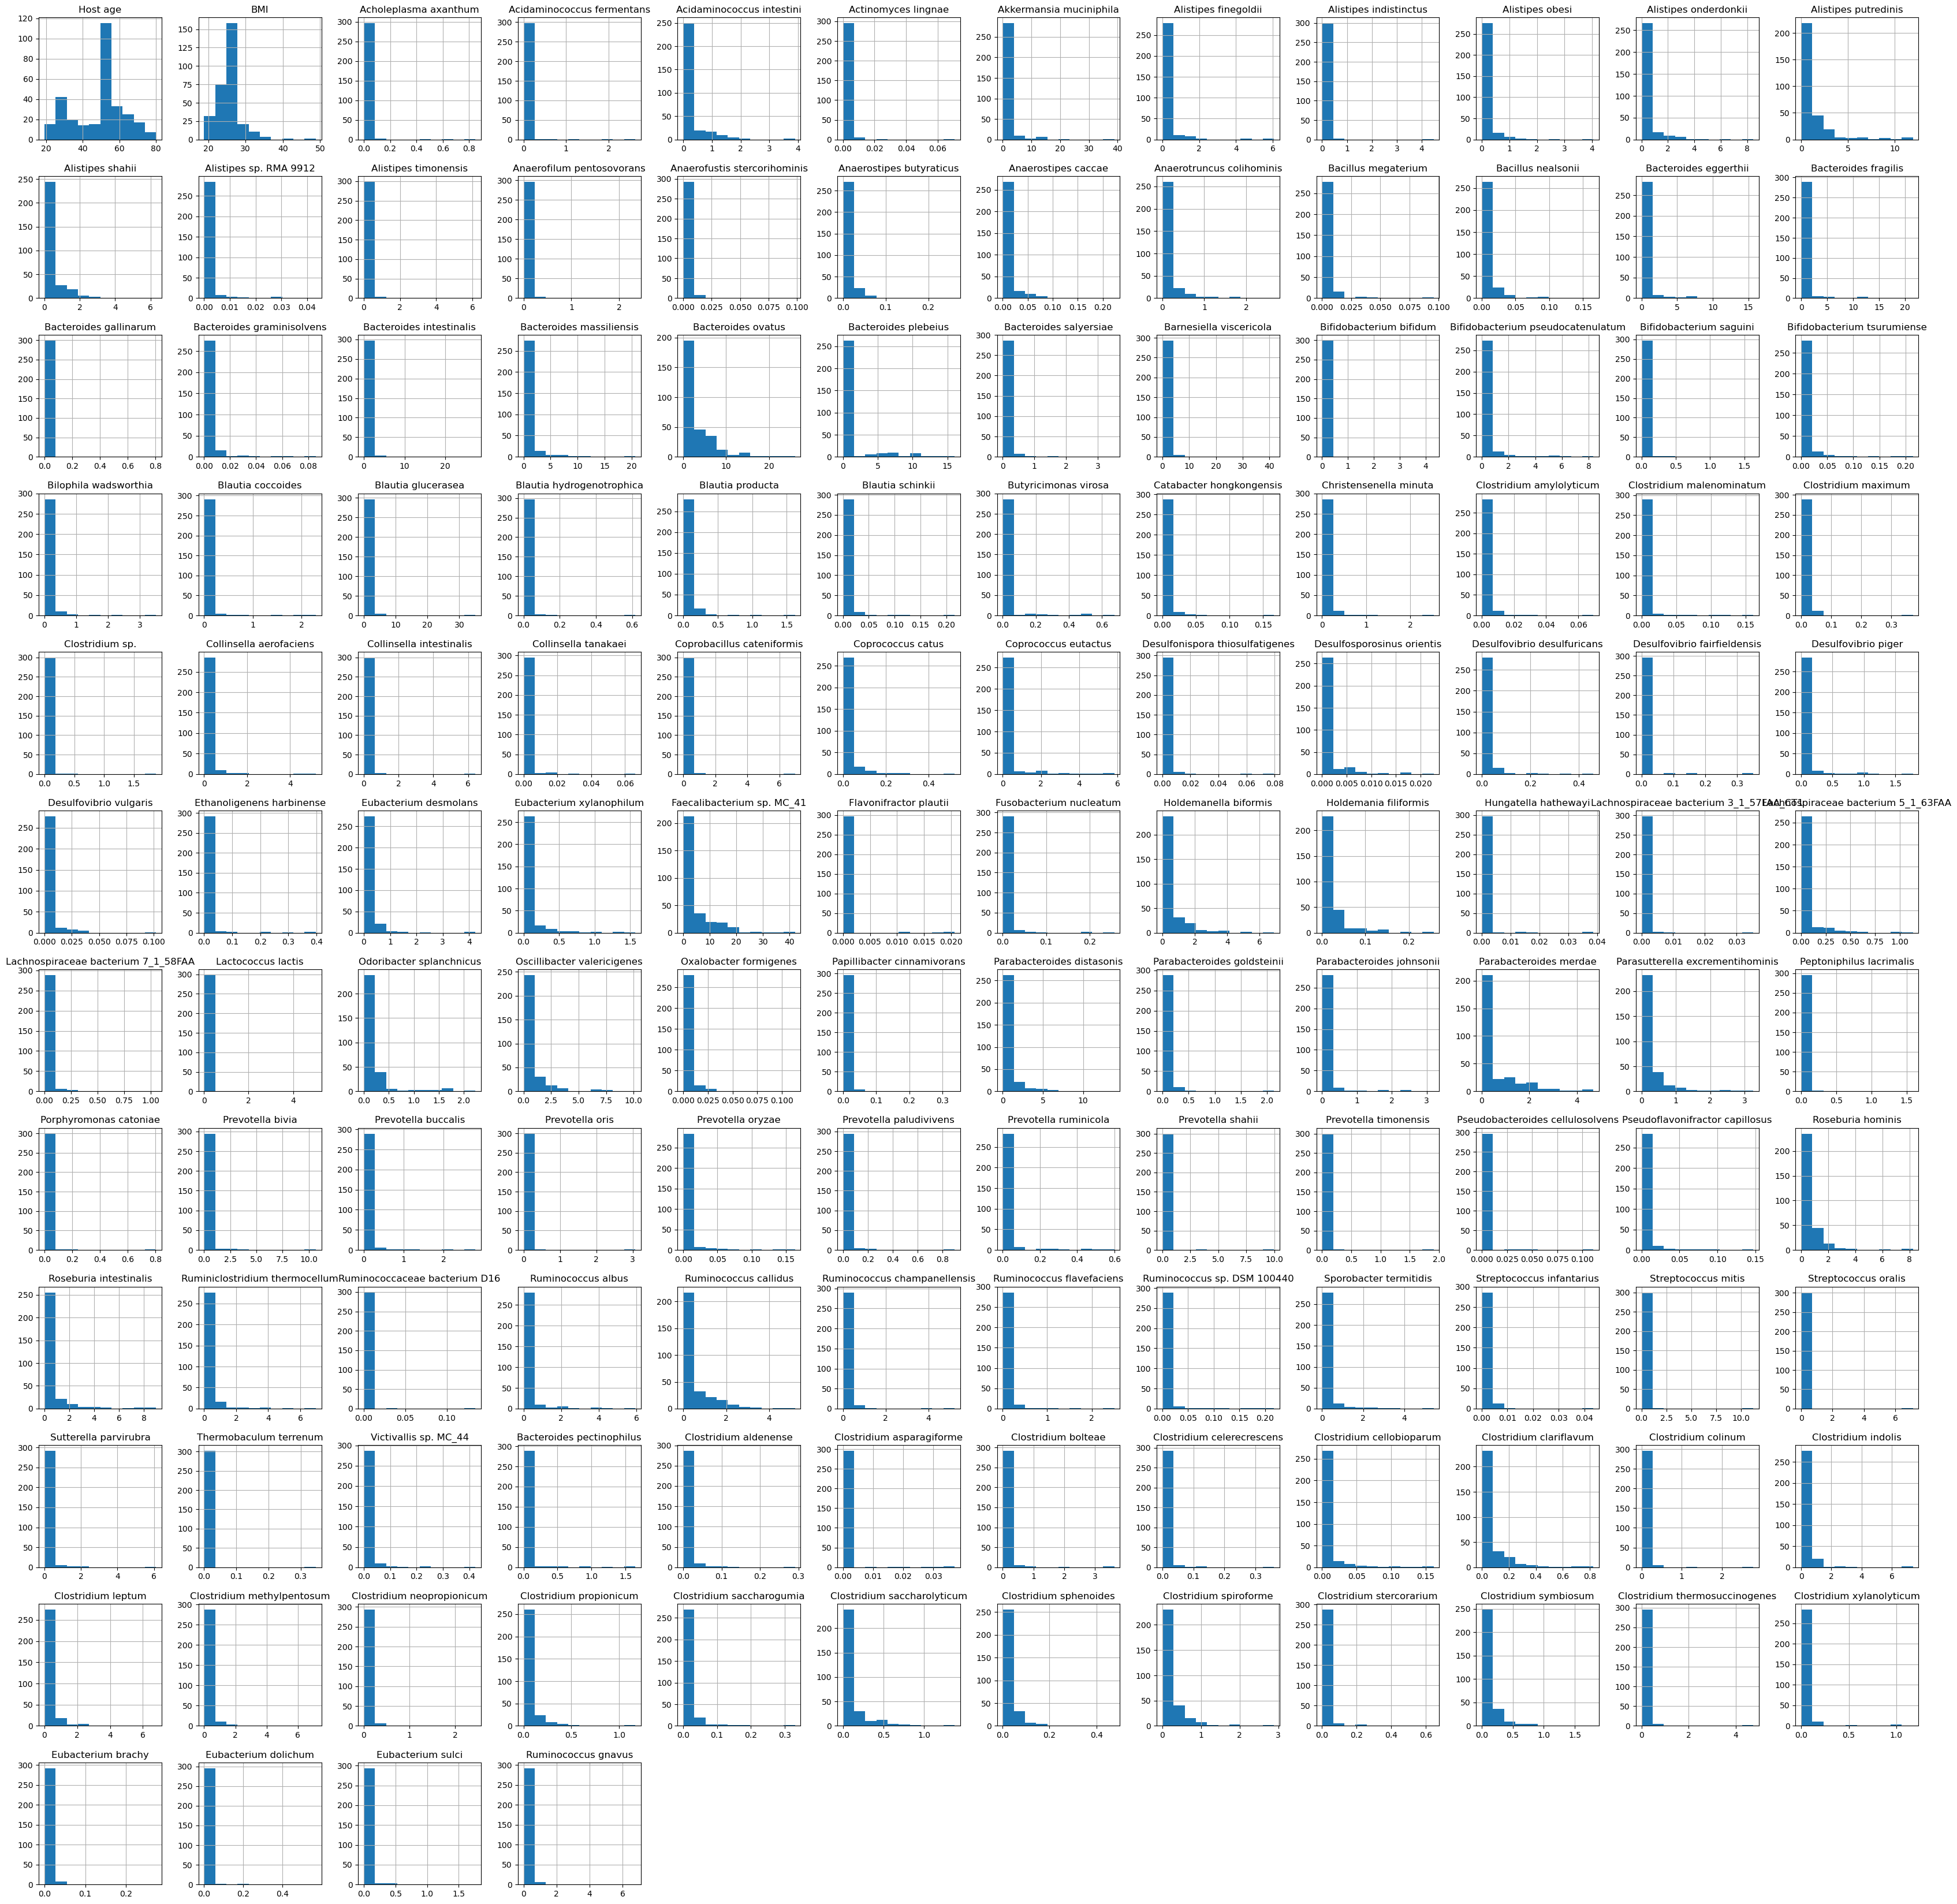

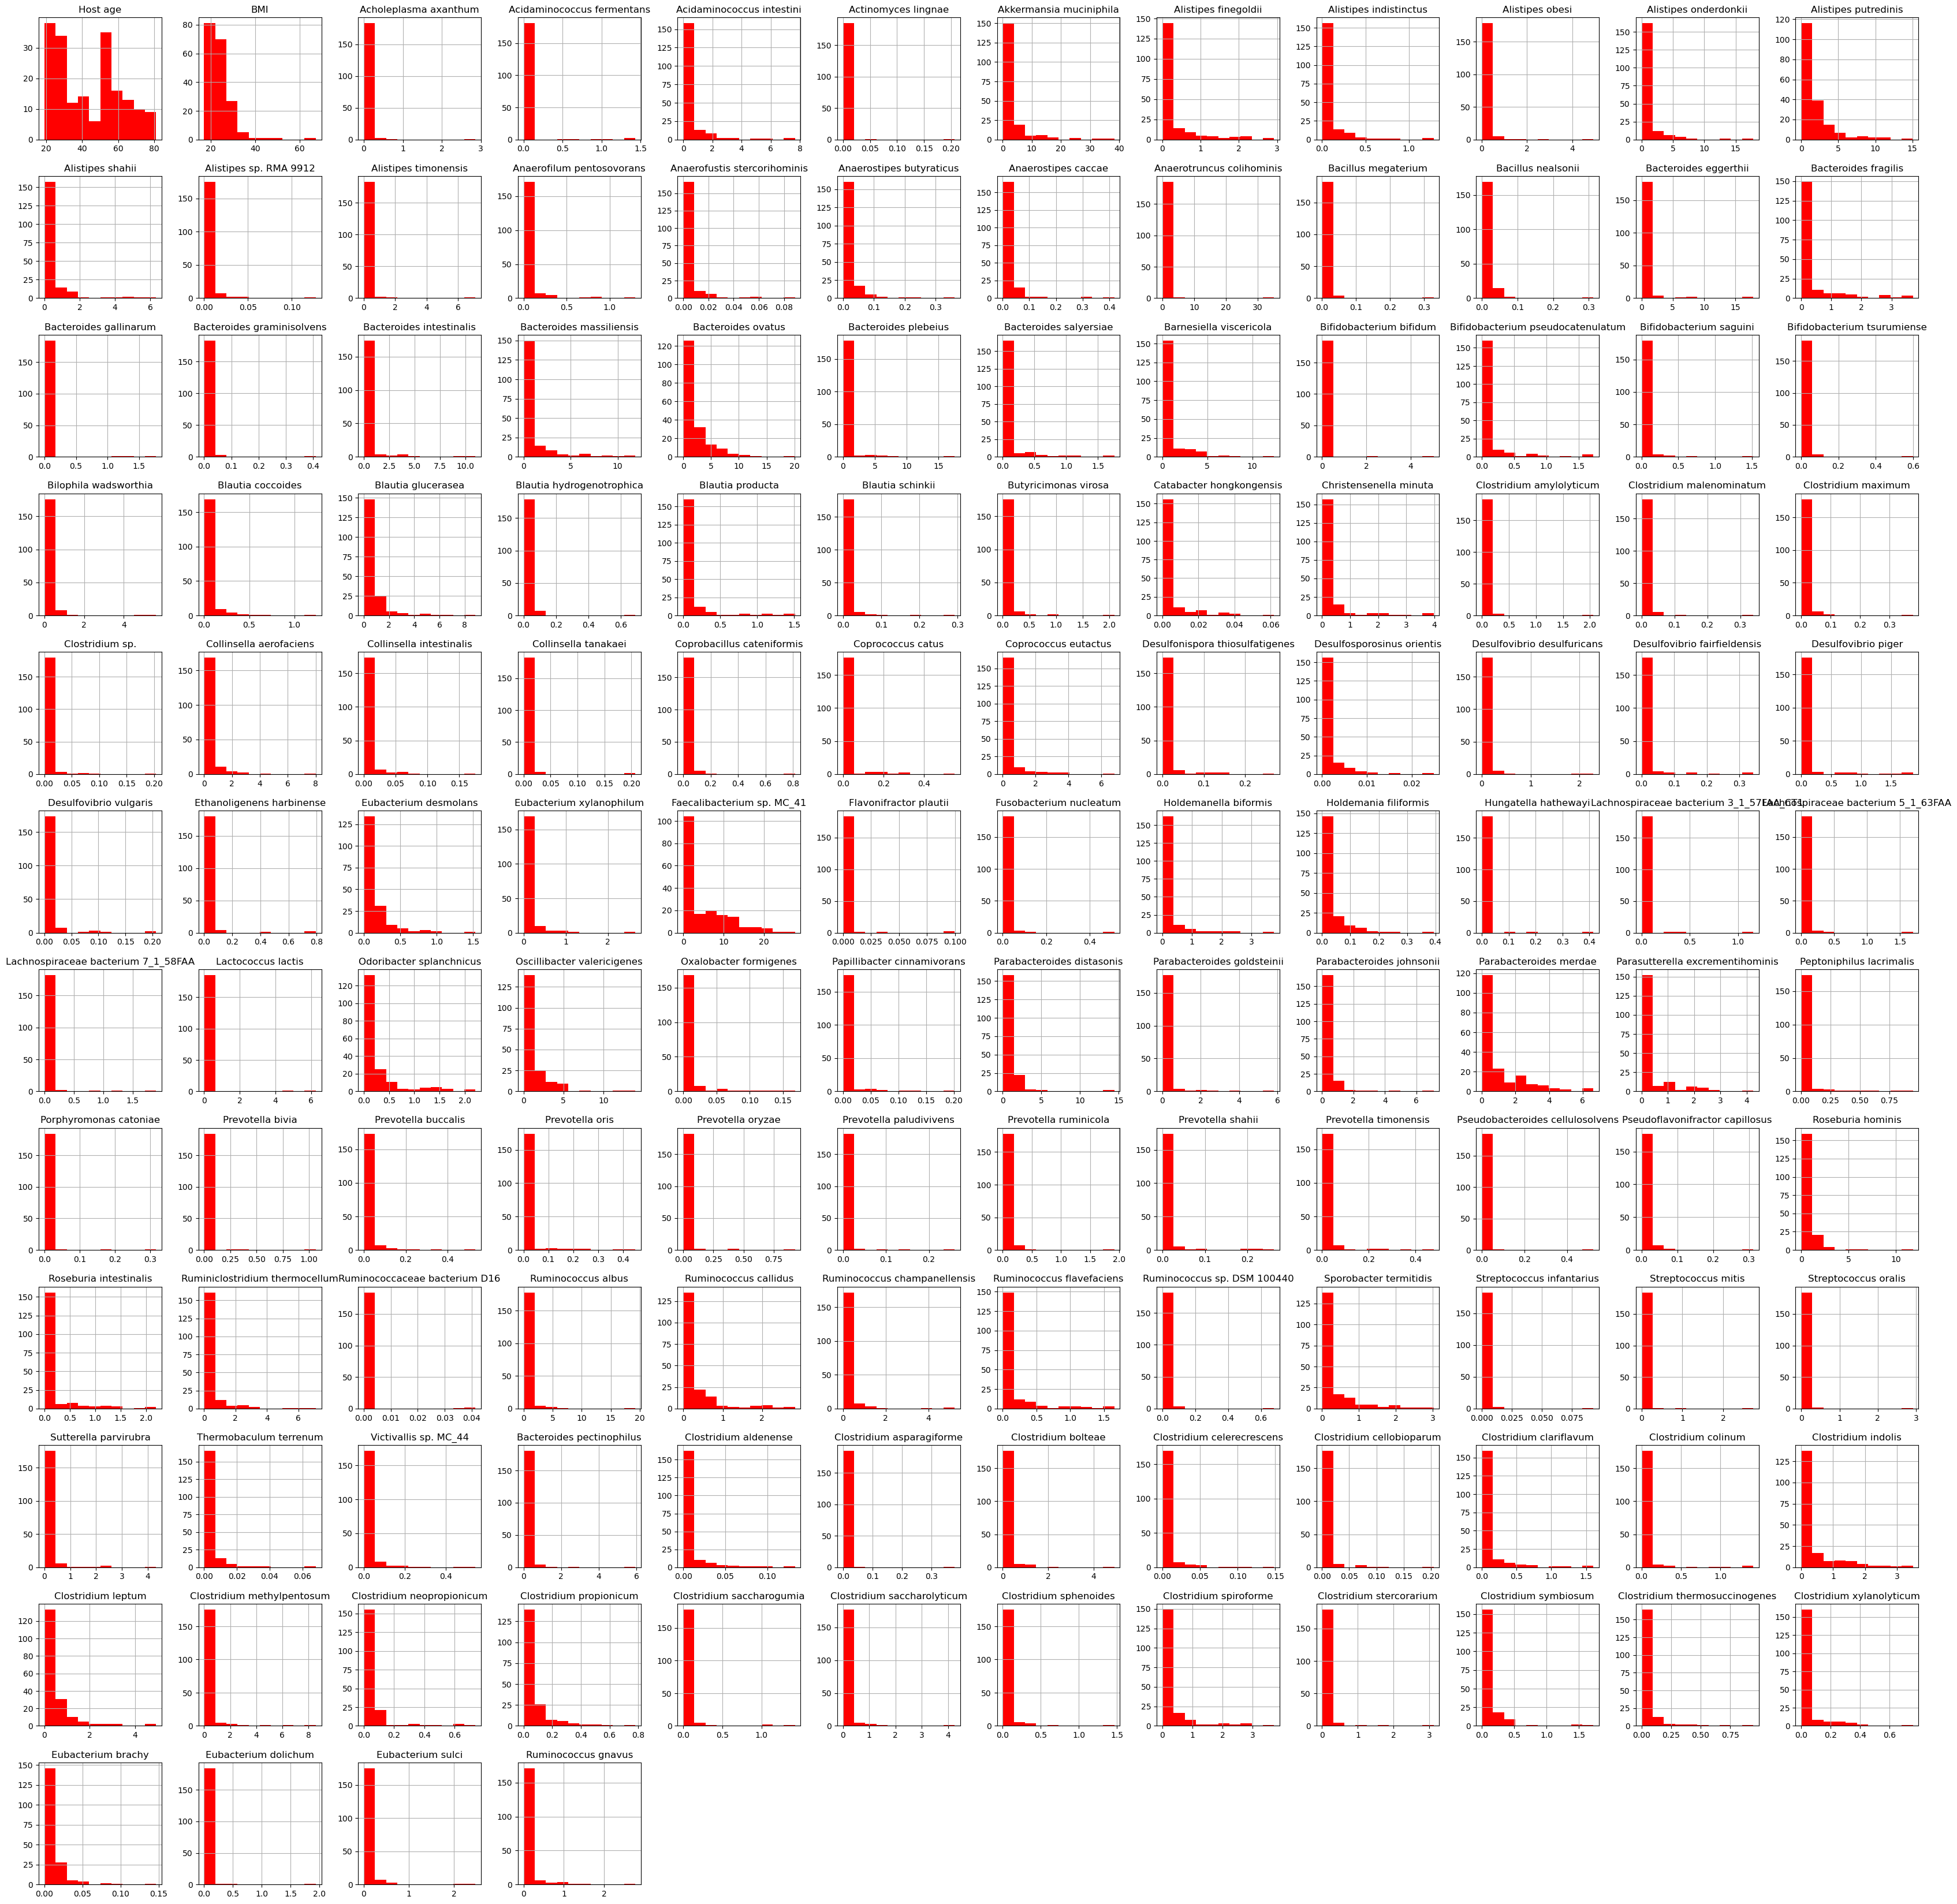

In [76]:
# Make plots for initial exploration
# Of course, this separation is just for the plots as bmi is expected to difer across sexes
# The entire dataframe will be used for training
males = train_dframe[train_dframe['Sex']=='Male']
females = train_dframe[train_dframe['Sex']=='Female']
print(f"Males: {len(males)}")
print(f"Females: {len(females)}")
males.hist(figsize = (42,42))
females.hist(figsize = (42,42), color='red')
plt.show()

</p>Above we can see the plots for each one of the numeric columns, where blue is the color for males and red for females. Something that could be concerning about the dataset is the fact that males and females are not equal, which is important as according to a priori knowledge, it is expected that BMI is different between the two sexes (in fact male samples seem to be over 50% more than female ones). Finally, from the plots that we made, we can observe that many of the distributions vary between males and females and these include some microbe columns as well. Further analysis is needed to understand the relationship between these distributions as, for example, also age distributions seem to differ between the two sexes, with males having more aged people/samples than females despite their number being 1.6 times larger. Ideally, our models must manage to overcome this and such biases and be able to generalize regardless of such imbalances.</p>

Males: 142
Females: 69


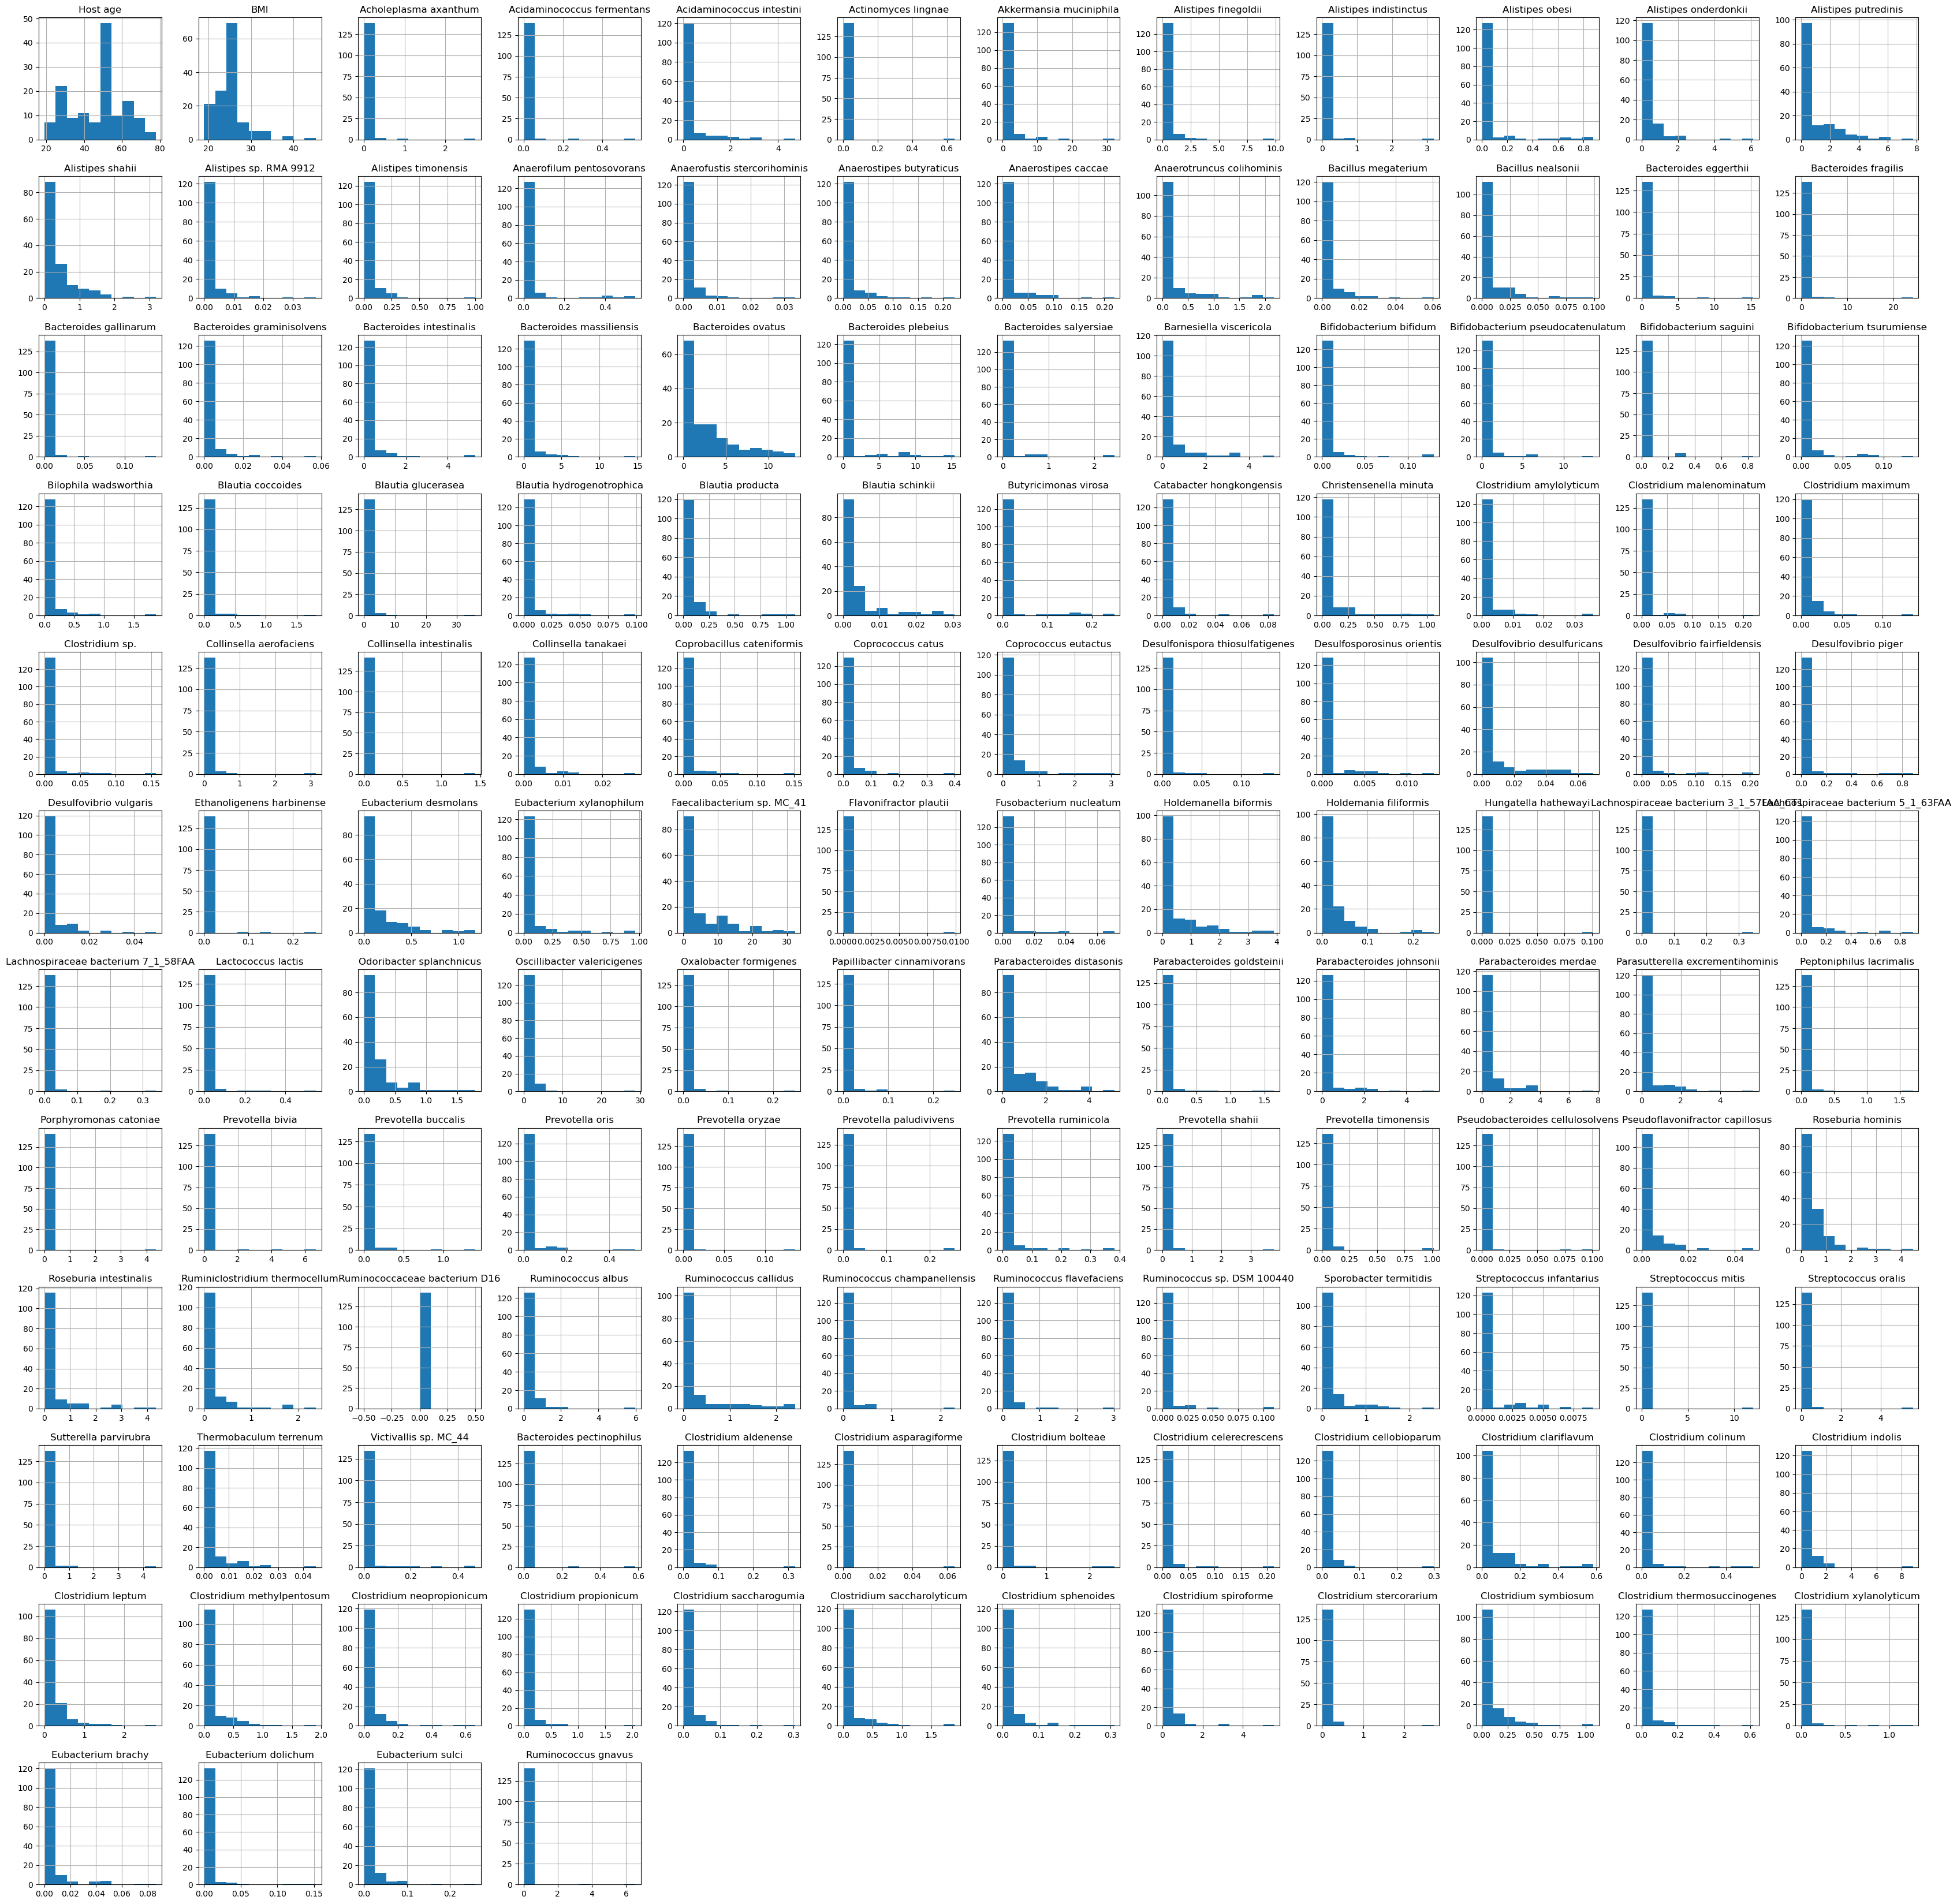

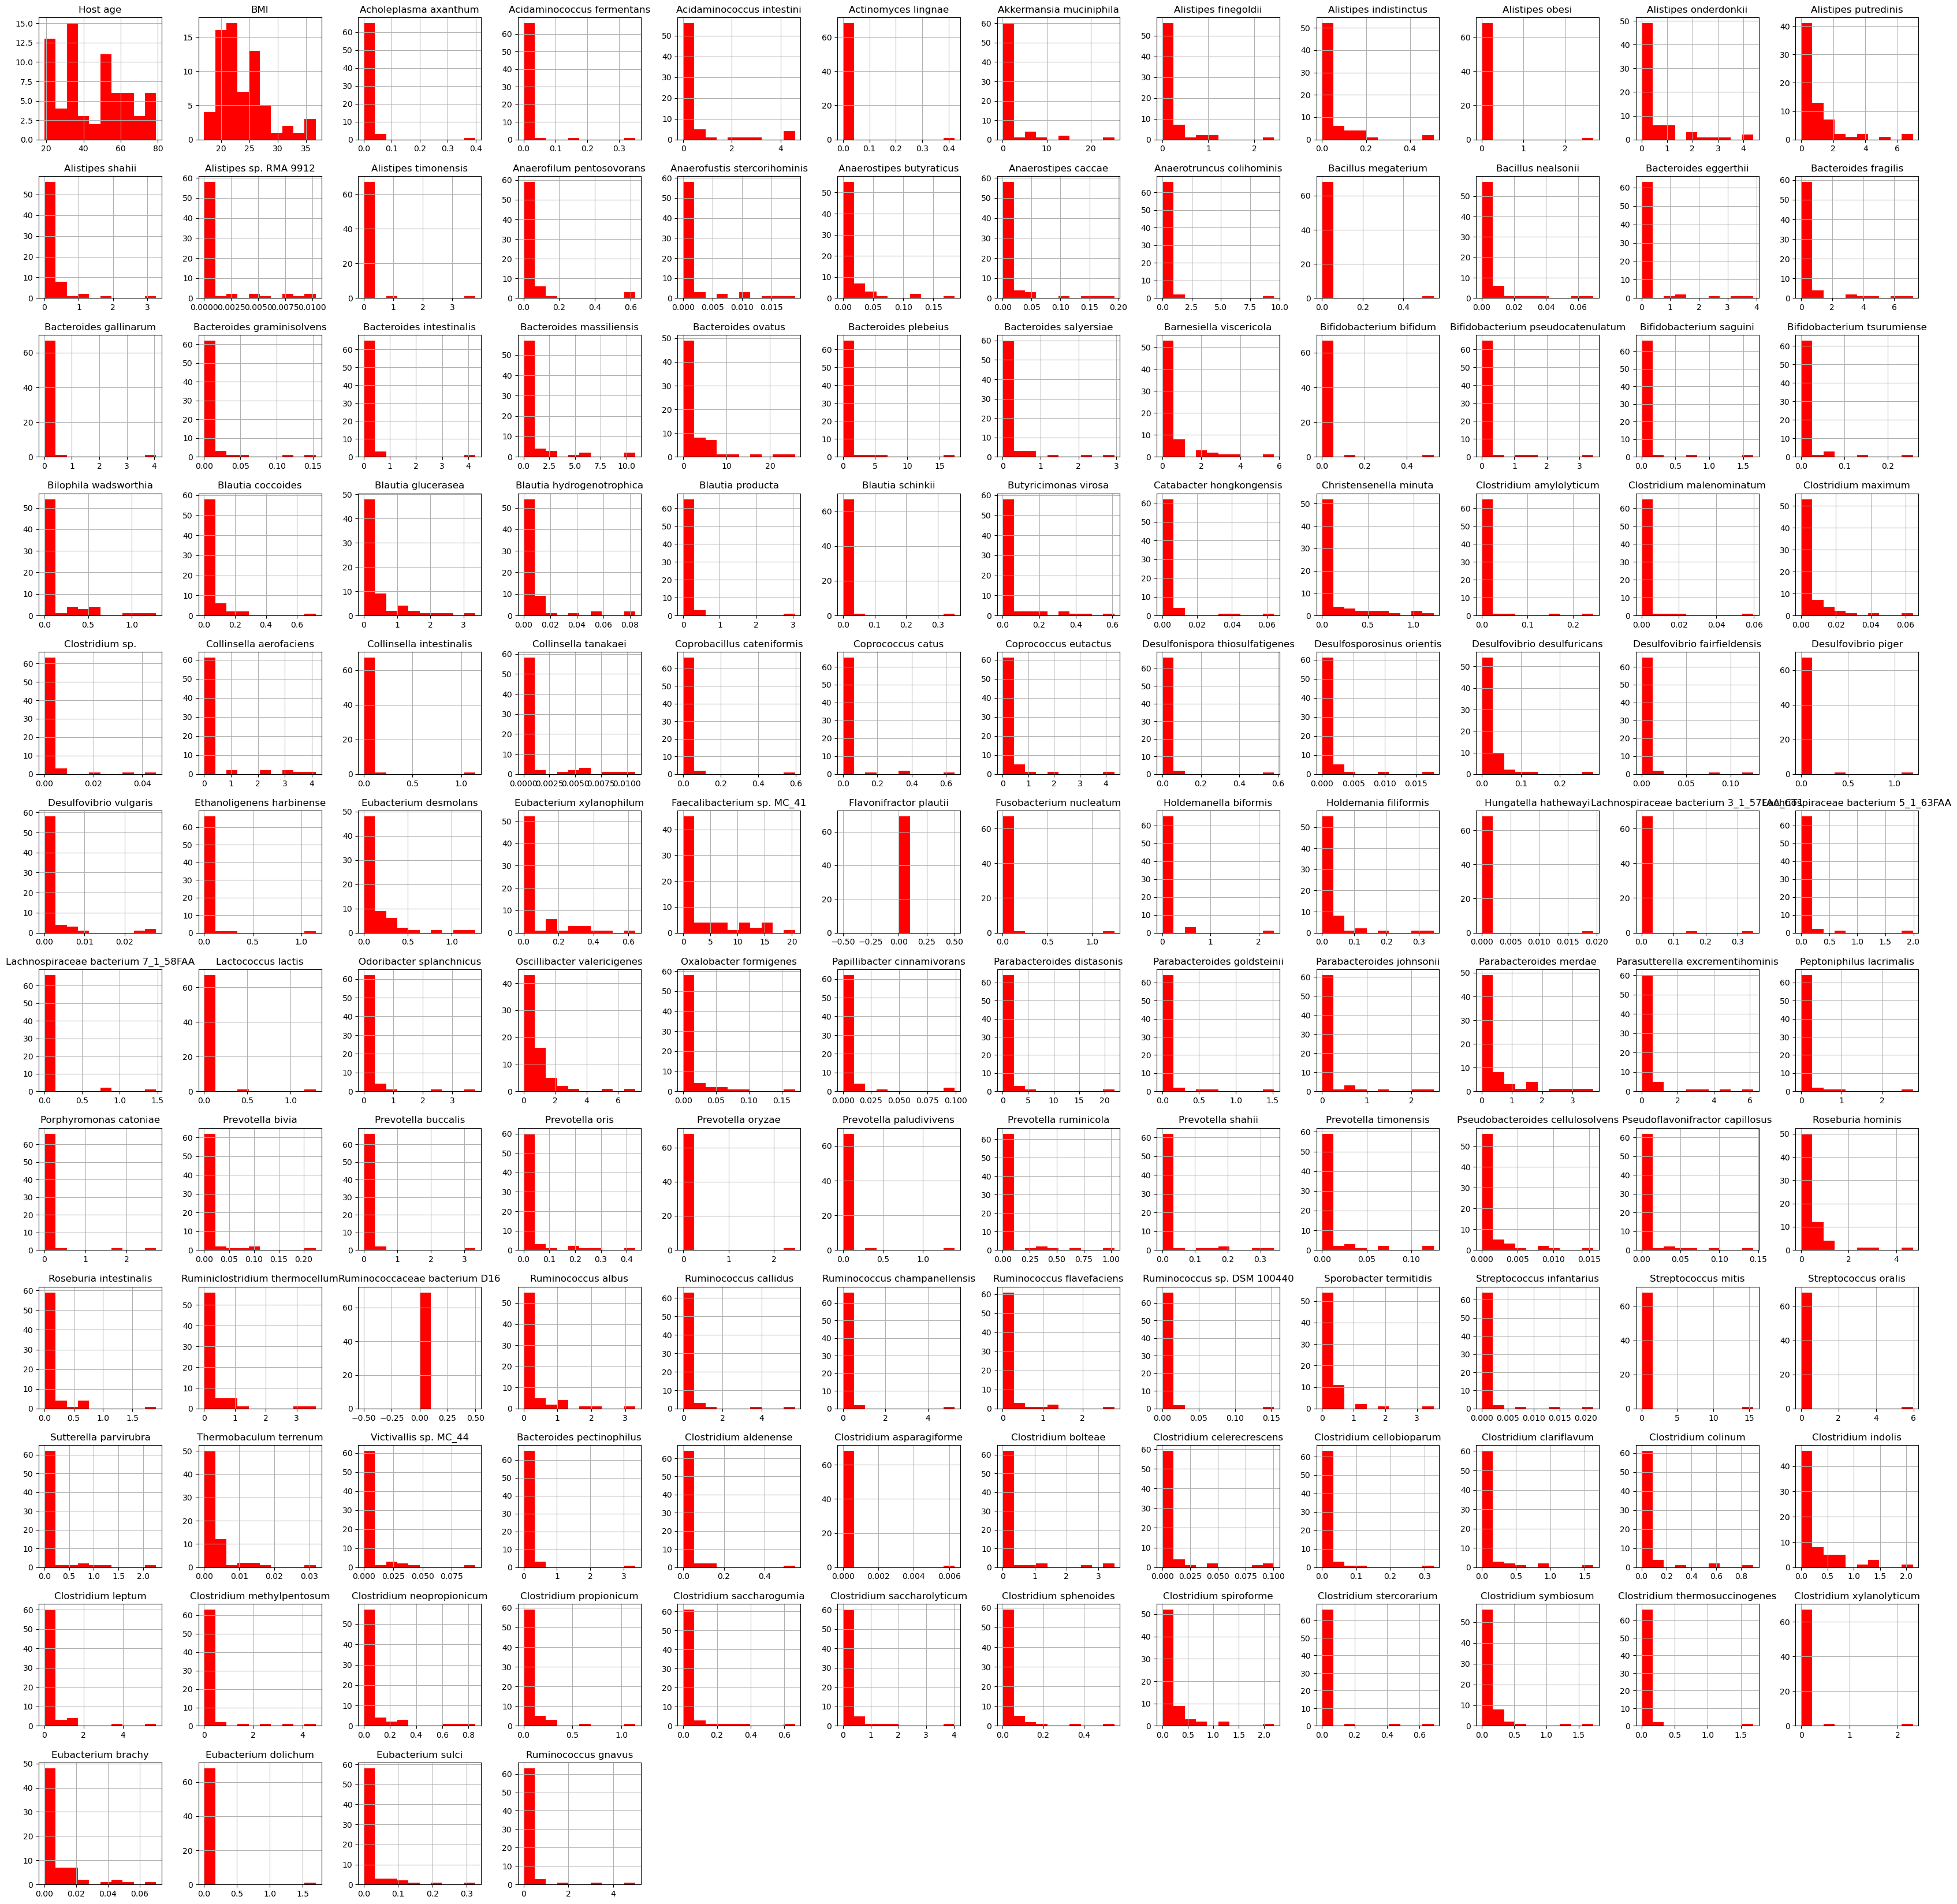

In [77]:
val_df = pd.read_csv(eval_data_path, header=0)
val_df = val_df.drop(columns=['Unnamed: 0'])
val_df = val_df.drop(columns=['Project ID'])
val_df = val_df.drop(columns=['Experiment type'])
val_df = val_df.drop(columns=['Disease MESH ID'])
males_val = val_df[val_df['Sex'] == 'Male']
females_val = val_df[val_df['Sex'] == 'Female']
print(f"Males: {len(males_val)}")
print(f"Females: {len(females_val)}")
# Make plots
males_val.hist(figsize = (42,42))
females_val.hist(figsize = (42,42), color='red')
plt.show()


</p>Plots for the evaluation set were also constructed to see if we are dealing with different distributions between the two sets. If training is conducted properly, the model should be able to generalize well to the evaluation set and thus it should be different from the training set to at least some extent. The evaluation set seems to differ in terms of male/female ratio as it is equal to 2 whereas the training set ratio is equal to 1.6. Furthermore, the age ditributions seem to be largely maintained, although young male samples are relatively more common in the evaluation set than in the training set.</p>

</p>It would be interesting to explore the distribution of different age groups in the two sets as well, since from these initial plots we can surmise that the age distribution differs between male and female samples and age is expected to be an important factor for determining the microbiome composition of the host and their BMI as well.</p>

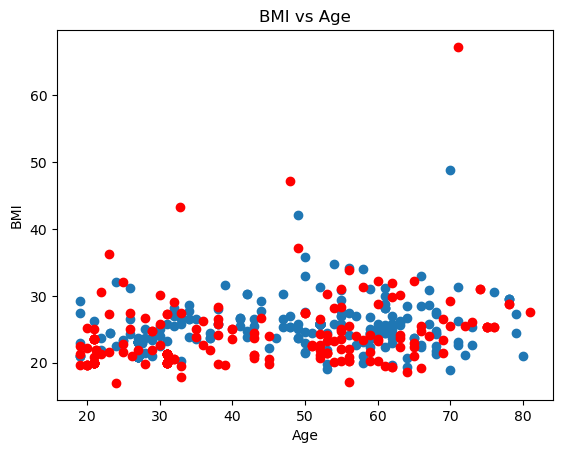

In [78]:
# Plot BMI with respect to age for males
plt.scatter(males['Host age'], males['BMI'])
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('BMI vs Age')
# Plot BMI with respect to age for females
plt.scatter(females['Host age'], females['BMI'], color='red')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

</p> The plot above illustrates the effect of age on BMI depending on the sex. We can see that the distributions of males and females are similar which might indicate that age has the same effect on both of these groups regarding their BMI. We can also observe some outliers in the data, however their number is rather low, and thus they should not be of concern. Keep in mind that a more thourough method is needed to see how these variables affect BMI, but this will be left for feature selection.</p>
<hr>

Here we will perform some basic preprocessing on our data so that they are appropriate for training a model. The preprocessing steps include:

1. Encoding categorical variables
2. Scaling numerical variables
3. Splitting the data into training and testing sets

We will use the `sklearn.preprocessing` module to perform these preprocessing steps.
For the scaler we will use `StandardScaler` and for the encoder we will use `OrdinalEncoder` and their instances will be saved using pickle in the folder models.

In [79]:
for col in train_dframe.columns:
    if col not in ['Sex_Male', 'BMI']:
        print(col)

Sex
Host age
Acholeplasma axanthum
Acidaminococcus fermentans
Acidaminococcus intestini
Actinomyces lingnae
Akkermansia muciniphila
Alistipes finegoldii
Alistipes indistinctus
Alistipes obesi
Alistipes onderdonkii
Alistipes putredinis
Alistipes shahii
Alistipes sp. RMA 9912
Alistipes timonensis
Anaerofilum pentosovorans
Anaerofustis stercorihominis
Anaerostipes butyraticus
Anaerostipes caccae
Anaerotruncus colihominis
Bacillus megaterium
Bacillus nealsonii
Bacteroides eggerthii
Bacteroides fragilis
Bacteroides gallinarum
Bacteroides graminisolvens
Bacteroides intestinalis
Bacteroides massiliensis
Bacteroides ovatus
Bacteroides plebeius
Bacteroides salyersiae
Barnesiella viscericola
Bifidobacterium bifidum
Bifidobacterium pseudocatenulatum
Bifidobacterium saguini
Bifidobacterium tsurumiense
Bilophila wadsworthia
Blautia coccoides
Blautia glucerasea
Blautia hydrogenotrophica
Blautia producta
Blautia schinkii
Butyricimonas virosa
Catabacter hongkongensis
Christensenella minuta
Clostridium

In [80]:
from sklearn.preprocessing import StandardScaler
# Convert relevant columns to numeric, handling any non-numeric entries
train_dframe = pd.get_dummies(train_dframe, columns=['Sex'], drop_first=True, dtype=float)
# Scale the numeric columns
cols_to_scale = [col for col in train_dframe.columns if col not in ['Sex_Male', 'BMI']]
scaler = StandardScaler()
train_dframe[cols_to_scale] = scaler.fit_transform(train_dframe[cols_to_scale])
scaler_path = project_root / "models" / "Standardscaler.pkl"
# Save the scaler
pickle.dump(scaler, open(scaler_path, 'wb'))


In [ ]:
train_dframe.head()
final_csv_path = project_root / "data" / "development_final_data.csv"
train_dframe.to_csv(final_csv_path, index=False)

In [82]:
# Convert relevant columns to numeric, handling any non-numeric entries
val_df = pd.get_dummies(val_df, columns=['Sex'], drop_first=True, dtype=float)

# Scale the numeric columns
with open(scaler_path, 'rb') as f:
    scaler = pickle.load(f)
    cols_to_scale = [col for col in val_df.columns if col not in ['Sex_Male', 'BMI']]
    val_df[cols_to_scale] = scaler.transform(val_df[cols_to_scale])
# Save the new dataframe
final_val_csv_path = project_root / "data" / "evaluation_final_data.csv"
val_df.to_csv(final_val_csv_path, index=False)

<p>Due to the exercise's description, it was finally decided that Age and Sex columns will be dropped so that only microbiome data is processed. However, these columns are expected to make proper convergence easier for the models and thus they will be added in future studies.</p>